# Determining predictors of heavy traffic on I-94

In this project, I will identify predictors of heavy traffic on I-94, an east-west interstate highway connecting the Great Lakes and northern Great Plains of the US.

Data for this project come from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) and contain metrics on westbound traffic on I-94.

## Setup

First, I load necessary libraries, load the data, and inspect the data:

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [124]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz'
traffic=pd.read_csv(url)

print(traffic['date_time'])

# show summary of dataset
print(traffic.info())

# show range of dates/times
print('Date/time: ')
print('Earliest: ' + traffic['date_time'].min())
print('Latest: ' + traffic['date_time'].max())

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       4

The dataset includes hourly metrics on weather conditions (temperature, rain, snowfall, cloud coverage) and traffic volume, for dates between October 2012 and September 2018.

## Explore distribution of traffic volume

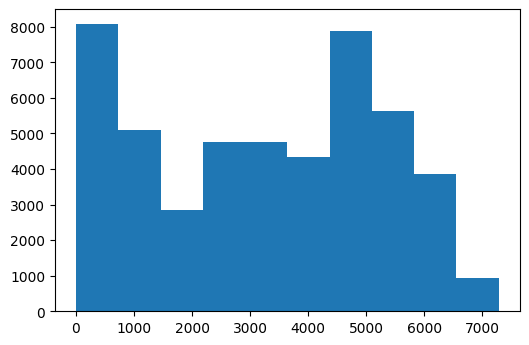

In [125]:
plt.hist(traffic['traffic_volume'])
plt.show()

In [126]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic hourly volume variable has a mean value of 3259 cars per hour, although the distribution has two peaks: around 0-500 cars per hour, and around 5000 cars per hour. These peaks likely reflect periods of low traffic at night and high traffic at rush hours, respectively.

## Comparing daytime and nighttime traffic

Next, I'll confirm what I suspected above by comparing traffic volume during daytime and nighttime.

First, I split the data into daytime (7am-7pm) and nighttime (after 7pm):

In [127]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['hour'] = traffic['date_time'].dt.hour

# get range of hours (9 - 23)
#print(traffic['hour'].min(), traffic['hour'].max())

# isolate daytime data
traffic_day = traffic[traffic['hour'] < 19]

# isolate nighttime data
traffic_night = traffic[traffic['hour'] >= 19]

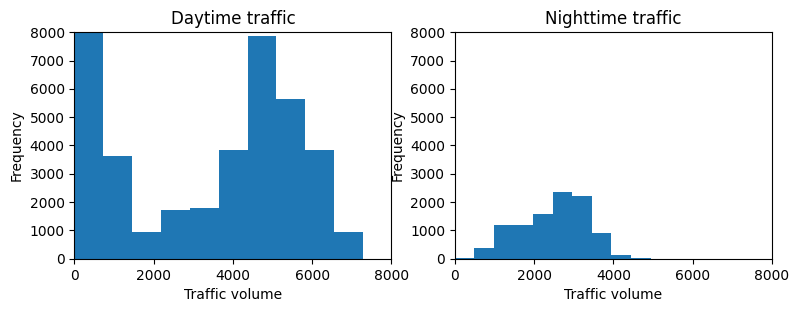

In [128]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Daytime traffic')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.title('Nighttime traffic')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])
plt.show()

From the histograms, we can see that during daytime hours, the distribution of traffic volume values is bimodal, peaking at low volumes (between 0-500 cars per hour) and high volumes (around 5000 cars per hour). On the other hand, during nighttime hours, the distribution of traffic volume is approaching normal, peaking around 3000 cars per hour.

Since my goal is to determine indicators of heavy traffic, I will focus on data from daytime hours in the next sections.

## Examining how traffic volume changes over time

First, I'll examine how traffic volume changes by month of the year:

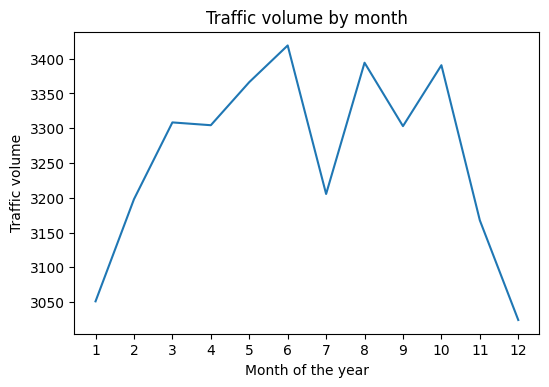

In [129]:
# group traffic volume data by month
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()

# create line plot of traffic by month
plt.plot(by_month['traffic_volume'])
plt.title('Traffic volume by month')
plt.xlabel('Month of the year')
plt.xticks(ticks=range(1, 13, 1))
plt.ylabel('Traffic volume')
plt.show()

The histogram shows that traffic is highest in the spring, summer, and fall months (when weather is warmer). June has peak traffic whereas January and December have the lowest traffic volume of all months.

Next, I'll examine traffic volume by day of the week:

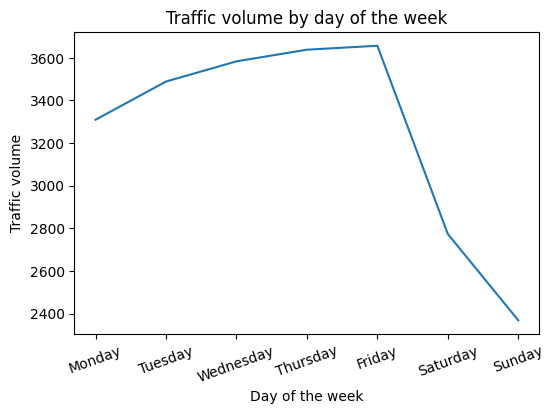

In [130]:
# group traffic volume data by day of the week
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek
by_day = traffic.groupby('day_of_week').mean()

# create line plot of traffic by day of the week
plt.plot(by_day['traffic_volume'])
plt.title('Traffic volume by day of the week')
plt.xlabel('Day of the week')
plt.xticks(ticks=range(0, 7, 1),
           labels=['Monday', 'Tuesday', 'Wednesday',
                  'Thursday', 'Friday', 'Saturday',
                  'Sunday'],
          rotation=20)
plt.ylabel('Traffic volume')
plt.show()

As expected, traffic is heaviest on weekdays (Monday-Friday) and lightest on weekend days (Saturday-Sunday).

Finally, I'll examine traffic by time of the day, splitting the data into weekdays and weekends:

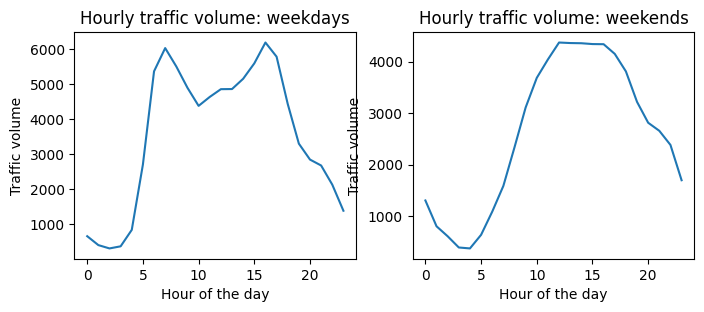

In [131]:
# split data into weekdays and weekends
weekdays = traffic.copy()[traffic['day_of_week'] <= 4]
weekends = traffic.copy()[traffic['day_of_week'] > 4]

# group traffic volume data by hour of the day
by_hr_weekdays = weekdays.groupby('hour').mean()
by_hr_weekends = weekends.groupby('hour').mean()

# create line plot of traffic by hour of the day
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(by_hr_weekdays['traffic_volume'])
plt.title('Hourly traffic volume: weekdays')
plt.xlabel('Hour of the day')
plt.ylabel('Traffic volume')

plt.subplot(1, 2, 2)
plt.plot(by_hr_weekends['traffic_volume'])
plt.title('Hourly traffic volume: weekends')
plt.xlabel('Hour of the day')
plt.ylabel('Traffic volume')

plt.show()

The traffic volume pattern on weekends and weekdays are roughly similar, with some notable differences: rush hours on weekdays are around 6-7am and 3-4pm, whereas rush hour on weekend is between 12pm and 4pm.

## Testing correlations between traffic volume and weather patterns

In [132]:
# compute pairwise correlations
corr_mat = traffic[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()
print(corr_mat['traffic_volume'])

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64


Temperature has the strongest correlation with traffic volume, so I plot a scatterplot reflecting the association between these variables:

0        288.28
1        289.36
2        289.58
3        290.13
4        291.14
          ...  
48199    283.45
48200    282.76
48201    282.73
48202    282.09
48203    282.12
Name: temp, Length: 48204, dtype: float64


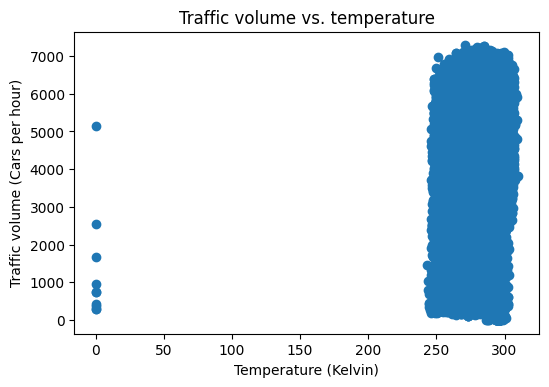

In [133]:
print(traffic['temp'])

plt.scatter(traffic['temp'],
            traffic['traffic_volume'])
plt.title('Traffic volume vs. temperature')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Traffic volume (Cars per hour)')
plt.show()

Although the variables are correlated, this correlation is driven by a few outliers for temperature. All in all, this figure shows that temperature is not a reliable indicator for heavy traffic.

Next, I will see whether the string columns describing weather conditions provide any indication of traffic volume.

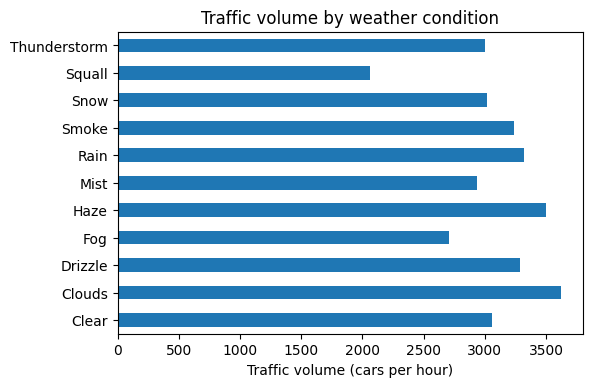

In [134]:
# compute mean traffic volume for each weather category
by_weather_main = traffic.groupby('weather_main').mean()

# create barplots for each weather category
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic volume by weather condition')
plt.xlabel('Traffic volume (cars per hour)')
plt.ylabel('')
plt.show()

Here we also do not see that any weather category is a useful indicator of traffic volume.

## Summary

In this project, I analyzed data on westbound I-94 traffic to identify potential indicators of heavy traffic volume on the highway. I found that:

- Traffic was heavier during warmer months and lighter during the coldest months of the year
- Traffic was heavier on weekdays compared to weekends
- Traffic was highest during rush hours, around 7 am and 4pm
- Weather condition and temperature were not reliable indicators of traffic volume.